In [1]:
# Chapter 13 

# Data Analysis Examples

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk

In [3]:
# https://github.com/Emaasit/pydata-book/blob/master/datasets/bitly_usagov/example.txt

# Bitly Data from 1.USA.gov

path = "example.txt"

with open(path) as f:
    print(f.readline())


{ "a": "Mozilla\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\/535.11 (KHTML, like Gecko) Chrome\/17.0.963.78 Safari\/535.11", "c": "US", "nk": 1, "tz": "America\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\/\/www.facebook.com\/l\/7AQEFzjSi\/1.usa.gov\/wfLQtf", "u": "http:\/\/www.ncbi.nlm.nih.gov\/pubmed\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }



In [4]:
import json 

with open(path) as f:
    records = [json.loads(line) for line in f]

records[6]


{'a': 'Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11',
 'c': 'PL',
 'nk': 0,
 'tz': 'Europe/Warsaw',
 'gr': '77',
 'g': 'wcndER',
 'h': 'zkpJBR',
 'l': 'bnjacobs',
 'al': 'pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4',
 'hh': '1.usa.gov',
 'r': 'http://plus.url.google.com/url?sa=z&n=1331923253510&url=http%3A%2F%2F1.usa.gov%2FzkpJBR&usg=TF5iGSqK1_GSADtHqTqjuUZyMIY.',
 'u': 'http://www.nasa.gov/mission_pages/nustar/main/index.html',
 't': 1331923255,
 'hc': 1331922854,
 'cy': 'Luban',
 'll': [51.116699, 15.2833]}

In [5]:
time_zones = [rec['tz'] for rec in records if 'tz' in rec]

time_zones[:10]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '']

In [6]:
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [7]:
def get_counts1(sequence):
    counts = {}
    for x in sequence:
        counts[x] = counts.get(x, 0) + 1
    return counts


In [8]:
from collections import defaultdict

def get_counts2(sequence):
    counts = defaultdict(int)  # Initialize with int to default to 0
    for x in sequence:
        counts[x] += 1
    return counts


In [9]:
from collections import Counter

counts = get_counts(time_zones)

top_10 = Counter(counts).most_common(10)
print(top_10)

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


In [10]:
counts['America/New_York']

1251

In [11]:
len(time_zones)

3440

In [12]:
counts1 = get_counts1(time_zones)
top_10_1 = Counter(counts1).most_common(10)
print(top_10_1)

[('America/New_York', 1251), ('', 521), ('America/Chicago', 400), ('America/Los_Angeles', 382), ('America/Denver', 191), ('Europe/London', 74), ('Asia/Tokyo', 37), ('Pacific/Honolulu', 36), ('Europe/Madrid', 35), ('America/Sao_Paulo', 33)]


In [13]:
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort(reverse=True)
    return value_key_pairs[:n]

top_counts(counts)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [14]:
top_counts(counts1)

[(1251, 'America/New_York'),
 (521, ''),
 (400, 'America/Chicago'),
 (382, 'America/Los_Angeles'),
 (191, 'America/Denver'),
 (74, 'Europe/London'),
 (37, 'Asia/Tokyo'),
 (36, 'Pacific/Honolulu'),
 (35, 'Europe/Madrid'),
 (33, 'America/Sao_Paulo')]

In [15]:
counts = Counter(time_zones)

counts.most_common(10)

[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

In [16]:
# Counting Time Zones with Pandas
# you can create a dataframe from the original set of records 
# by passing the list of records to pandas.Dataframe


In [17]:
frame = pd.DataFrame(records)

frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [18]:
frame["tz"].head()

0     America/New_York
1       America/Denver
2     America/New_York
3    America/Sao_Paulo
4     America/New_York
Name: tz, dtype: object

In [19]:
tz_counts = frame['tz'].value_counts()

tz_counts[:10]

tz
America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: count, dtype: int64

<Axes: ylabel='tz'>

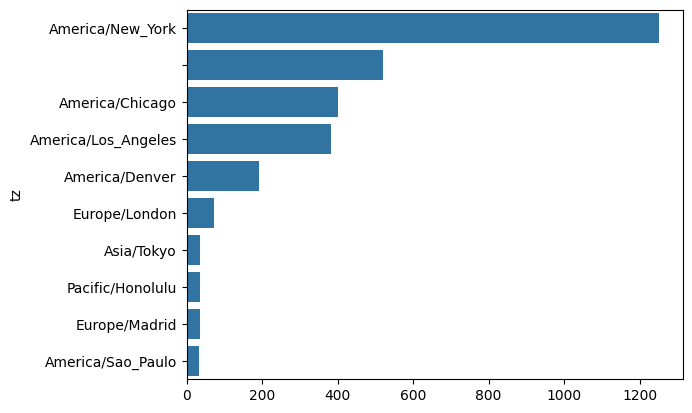

In [20]:
subset = tz_counts[:10]

sns.barplot(y=subset.index, x=subset.to_numpy())

In [21]:
frame['a'][1]

'GoogleMaps/RochesterNY'

In [22]:
frame['a'][50]

'Mozilla/5.0 (Windows NT 5.1; rv:10.0.2) Gecko/20100101 Firefox/10.0.2'

In [23]:
frame['a'][51][:50]

'Mozilla/5.0 (Linux; U; Android 2.2.2; en-us; LG-P9'

In [24]:
results = pd.Series([x.split()[0] for x in frame.a.dropna()])

results.head()

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
dtype: object

In [25]:
results.value_counts().head(8)

Mozilla/5.0                 2594
Mozilla/4.0                  601
GoogleMaps/RochesterNY       121
Opera/9.80                    34
TEST_INTERNET_AGENT           24
GoogleProducer                21
Mozilla/6.0                    5
BlackBerry8520/5.0.0.681       4
Name: count, dtype: int64

In [26]:
cframe = frame[frame.a.notnull()].copy()

# Suppose you want to decompose the top time zones into 
# Windows and non-Windows users.


In [27]:
cframe['os'] = np.where(cframe['a'].
                        str.contains('Windows'), 'Windows', 'Non-Windows')

In [28]:
cframe['os'].head(5)


0        Windows
1    Non-Windows
2        Windows
3    Non-Windows
4        Windows
Name: os, dtype: object

In [29]:
by_tz_os = cframe.groupby(['tz', 'os'])

agg_counts = by_tz_os.size().unstack().fillna(0)

# grouping the data by its time zone column and 
# this new list of operating systems

# The group counts, analogous to a contingency table, can be visualized
# to the value_counts function, can be computed with size

In [30]:
agg_counts[:10]

os,Non-Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
Africa/Lusaka,0.0,1.0
America/Anchorage,4.0,1.0
America/Argentina/Buenos_Aires,1.0,0.0
America/Argentina/Cordoba,0.0,1.0


In [31]:
indexer = agg_counts.sum(axis=1).argsort()

indexer.values[:10]

array([ 2,  7,  5,  4, 14, 11,  9,  8, 24, 26])

In [32]:
count_subset = agg_counts.take(indexer.values[-10:])
count_subset 

# slices off the last 10 or '[-10:]' rows (largest values)

os,Non-Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [33]:
agg_counts.sum(axis='columns').nlargest(10)

# pandas has a convenience method called nlargest to call those

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [34]:
count_subset = count_subset.stack()

count_subset.name = 'total'

count_subset = count_subset.reset_index()

In [35]:
count_subset.head(10)

,tz,os,total
0,America/Sao_Paulo,Non-Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Non-Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Non-Windows,0.0
5,Pacific/Honolulu,Windows,36.0
6,Asia/Tokyo,Non-Windows,2.0
7,Asia/Tokyo,Windows,35.0
8,Europe/London,Non-Windows,43.0
9,Europe/London,Windows,31.0


<Axes: xlabel='total', ylabel='tz'>

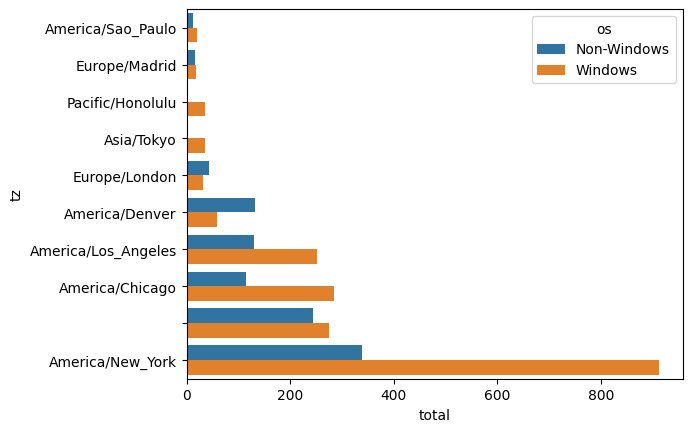

In [36]:
sns.barplot(x='total', y='tz', hue='os', data=count_subset)


In [37]:
def norm_total(group):
    group['normed_total'] = group.total / group.total.sum()
    return group

results = count_subset.groupby('tz').apply(norm_total)

# it is a bit difficult to see the relative percentages with the current plot


C:\Users\NITRO\AppData\Local\Temp\ipykernel_21940\2216811166.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = count_subset.groupby('tz').apply(norm_total)


<Axes: xlabel='normed_total', ylabel='tz'>

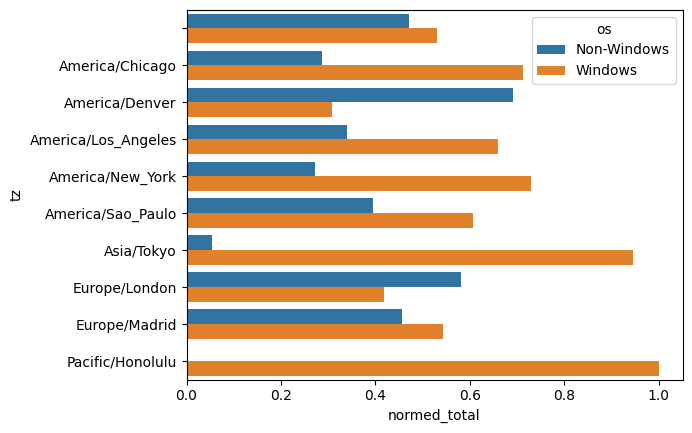

In [38]:
sns.barplot(x='normed_total', y='tz', hue='os', data=results)

In [39]:
g = count_subset.groupby('tz') 

results2 = count_subset['total'] / g['total'].transform('sum')

# we could have computed the normalized sum more efficiently by using
# the `transform` method directly on the groupby object

In [40]:
# 13.2 MovieLens 1M Dataset

# here i am using tmdb.dat files from Kaggle


In [ ]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']

users = pd.read_table(
	r"F:\terrabox download\tmdb_movie_dataset.dat",
	sep='|',
	header=None,
	names=unames,
	engine='python',
	quoting=3,  # 3 means csv.QUOTE_NONE
	on_bad_lines='skip'     # skip bad lines and warn about them
)

In [ ]:
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']

ratings = pd.read_table(
	r"F:\terrabox download\tmdb_movie_dataset.dat",
	sep='|',
	header=None,
	names=rnames,
	engine='python',
	quoting=3,  # 3 means csv.QUOTE_NONE
	on_bad_lines='skip'     # skip bad lines and warn about them
)


In [ ]:
mnames = ['movie_id', 'title', 'genres']

movies = pd.read_table(
	r"F:\terrabox download\tmdb_movie_dataset.dat",
	sep='|',
	header=None,
	names=mnames,
	engine='python',
	quoting=3,  # 3 means csv.QUOTE_NONE
	on_bad_lines='skip'     # skip bad lines and warn about them
)


In [ ]:
users.head(2)

,,,,,,,,,,,,,,,,,,,user_id,gender,age,occupation,zip
id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
27205,Inception,8.364,34495,Released,2010-07-15,825532764,148,False,/8ZTVqvKDQ8emSGUEMjsS4yHAwrp.jpg,160000000,https://www.warnerbros.com/movies/inception,tt1375666,en,Inception,"Cobb, a skilled thief who commits corporate espionage by infiltrating the subconscious of his targets is offered a chance to regain his old life as payment for a task considered to be impossible: ""inception"", the implantation of another person's idea into a target's subconscious.",83.952,/oYuLEt3zVCKq57qu2F8dT7NIa6f.jpg,Your mind is the scene of the crime.,"Action, Science Fiction, Adventure","Legendary Pictures, Syncopy, Warner Bros. Pic...","United Kingdom, United States of America","English, French, Japanese, Swahili","rescue, mission, dream, airplane, paris, fran..."
